In [5]:
import numpy as np
x=np.arange(12).reshape((4,3))
print(x)
y=x[-2:,:].copy()#-2nd row and everything down, everything in those rows
y*=100
y

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[ 600,  700,  800],
       [ 900, 1000, 1100]])

In [18]:
def myfn(arr):
    #arr=arr.copy()
    arr=arr*2
    #print('hi')
    print(arr)

In [19]:
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [15]:
myfn(x)

[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]
 [18 20 22]]


In [17]:
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [119]:
def objarr(filename):
    data=np.genfromtxt('/Users/amandanewmark/repositories/usrp-sciprog/projects/transit/data/{}'.format(filename), dtype=None, names=True)
    return data['Time'],data['Flux']

In [122]:
Time, Flux = objarr("7016.01.txt")

In [125]:
print(Flux)

[ 0.99987043  1.00005706  1.00018447  1.0002736   1.0000373   0.99997776
  0.99998809  0.99990366  1.00010882  1.00007373  0.99993888  1.00008325
  0.99988474  0.99990076  1.00004753  1.00007467  0.99998296  0.99993863
  1.0000938   0.99986546  0.99982724  1.00008236  1.00013548  1.00014642
  0.99985784  1.00014276  0.99994685  0.99987698  0.99997868  0.99985723
  1.00009091  1.00005562  1.00007345  0.99998024  0.99982326  1.00014458
  1.0001812   0.99986829  1.00013842  1.00008297  1.00007603  0.99989056
  1.00010016  0.99976917  0.99976319  0.99993602  0.99993621  1.00010429
  1.00002873  1.00020544  0.99998118  0.99994874  1.00010779  0.99983461
  0.99992816  1.00027783  0.99977548  0.99991454  1.00014262  1.00014711
  0.99998608  0.99998222  0.99995168  0.99983434  1.00016516  1.00013714
  1.00016925  0.99982907  1.00010919  1.00022612  0.99994743  0.99990214
  0.99994323  0.99990229  0.99993746  1.00005497  1.00006488  0.99980054
  0.9999567   1.00024139  1.00023474  0.99988582  1

In [141]:
def TFplot(x, y): #plots Time v Flux
    plt.plot(x, y)
    plt.xlabel('Time(s)')
    plt.ylabel('Flux(W)')
    plt.show
    return plt.plot(x,y)

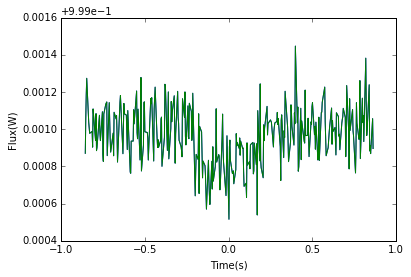

In [149]:
TF=TFplot(Time, Flux)
TF

In [148]:
def trapfit(params, x,y): #depth, duration, ingress duration, and center time
    delta=params[0]
    T=params[1]
    tau=params[2]
    t0=params[3]
    y.where(x=False)
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-148-8b0234ffe533>, line 2)